<a href="https://colab.research.google.com/github/aliaa-13/Data-analytics-using-python-/blob/main/day5%2C6%267.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Sample - Superstore.csv to Sample - Superstore.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 

/tmp/ipython-input-1-1679786536.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sub-Category', y='Sales', estimator=sum, ci=None)


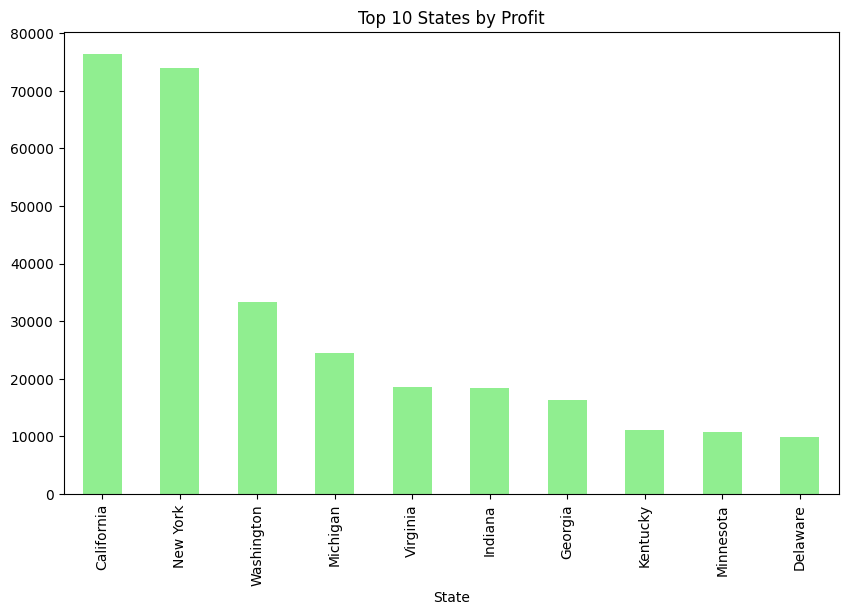

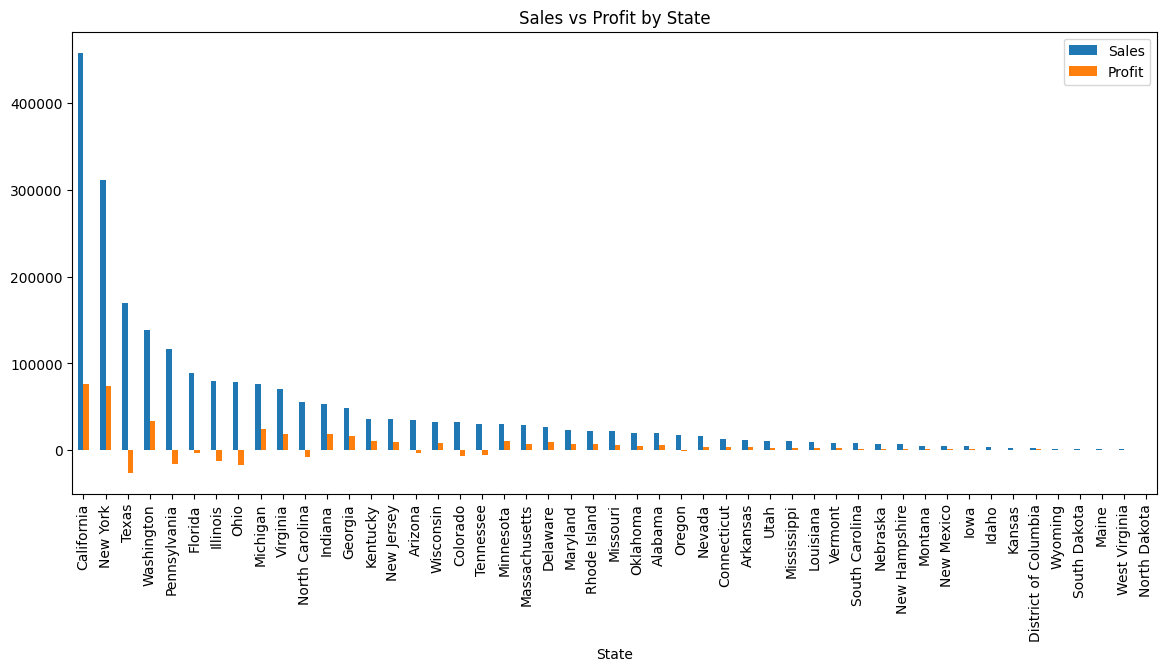

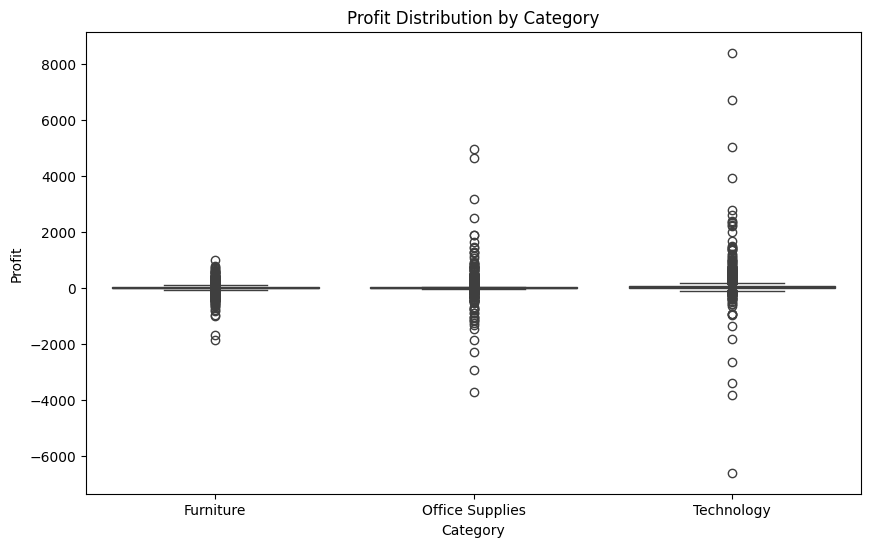

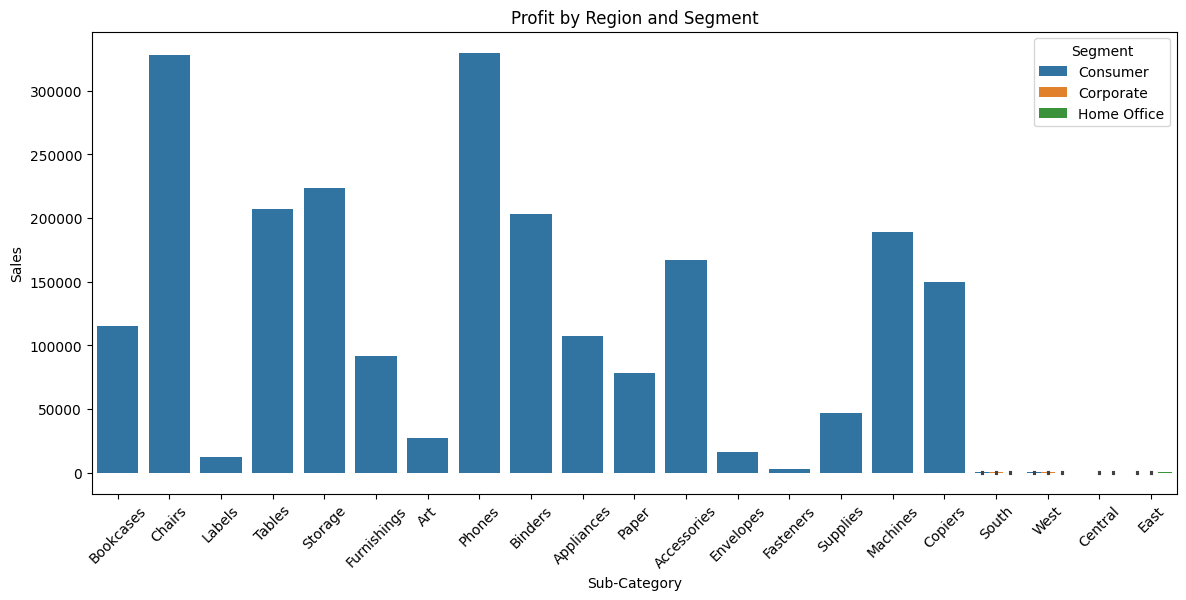

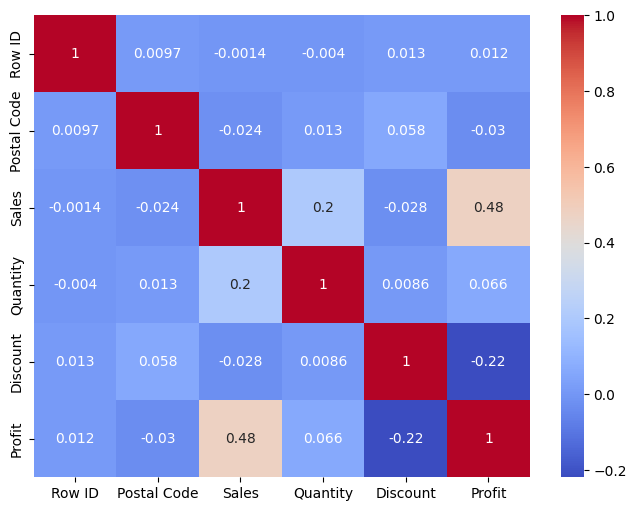

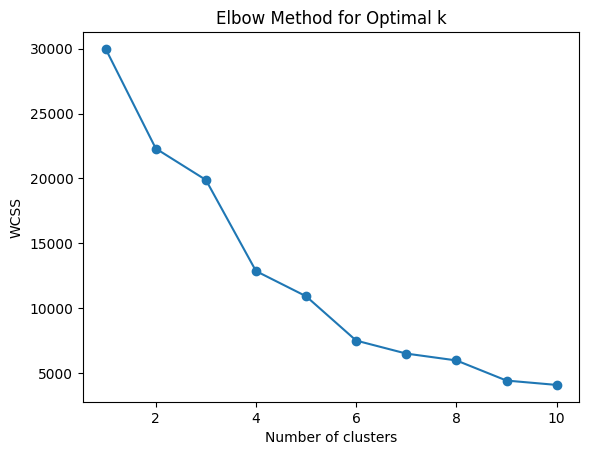

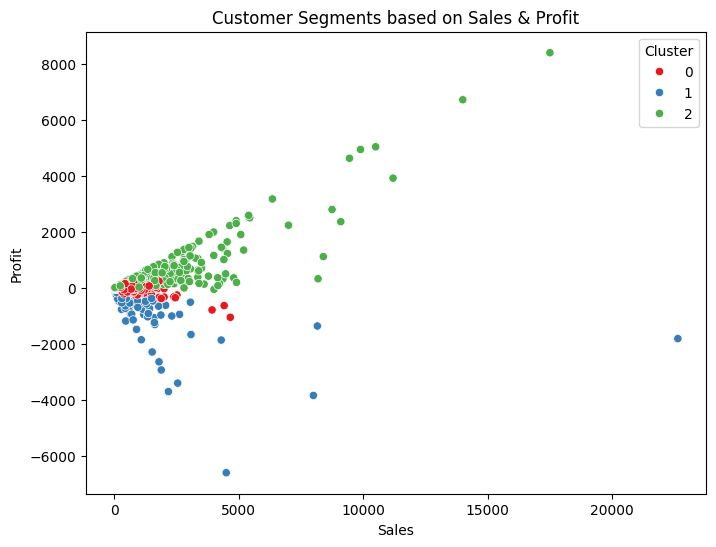

,Sales,Profit,Discount
Cluster,,,
0,190.115161,5.193000,0.214688
1,172.459770,-116.445818,0.695776
2,273.463852,75.609863,0.005246


In [ ]:
import os
os.listdir()

from google.colab import files
uploaded= files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()
df.info()
df.isnull().sum()
df.nunique()
df.shape

top_states_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
top_states_profit.plot(kind='bar', figsize=(10,6), color='lightgreen', title='Top 10 States by Profit')

top_states_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
top_states_profit.plot(kind='bar', figsize=(10,6), color='lightgreen', title='Top 10 States by Profit')

state_data = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
state_data.plot(kind='bar', figsize=(14,6), title='Sales vs Profit by State')

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Profit')
plt.title('Profit Distribution by Category')
plt.figure(figsize=(14,6))

sns.barplot(data=df, x='Sub-Category', y='Sales', estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Sales by Sub-Category')

sns.barplot(data=df, x='Region', y='Profit', hue='Segment')
plt.title('Profit by Region and Segment')
plt.legend(title='Segment')

corr_matrix= df.corr(numeric_only=True)
corr_matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


features= df[['Sales','Profit','Discount']]
features.head()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='Set1')
plt.title("Customer Segments based on Sales & Profit")
plt.show()

df.groupby('Cluster')[['Sales', 'Profit', 'Discount']].mean()
